In [ ]:
#!pip install pyfrc frc3223-azurite

In [ ]:
#!conda install -c menpo ffmpeg -y

In [1]:
import numpy
from matplotlib import pyplot as plt
from frc3223_azurite.motors import *
from frc3223_azurite.conversions import *
from frc3223_azurite.pidcontroller import NoThreadingPIDController as PIDController
from arm import ArmSimulation

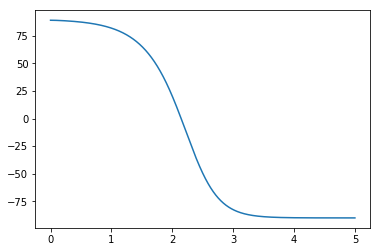

In [24]:
def init(state):
    import wpilib
    state.timer = wpilib.Timer()
    state.timer.start()
    state.motor.set(0.0)
    def pid_source():
        return state.theta_rad
    def pid_output(v):
        state.motor.set(v)
    state.pid = PIDController(Kp = 0.0, Ki = 0.0, Kd = 0.0, Kf = 0.0, source = pid_source, output = pid_output)
    state.pid.setOutputRange(-1, 1)
    state.pid.setSetpoint(numpy.radians(45))
    state.pid.enable()
    
    
def periodic(state):
    # state.stop = True
    #state.timer.get()
    pass

sim = ArmSimulation(
    dt_s=0.001,
    starting_position_rad=numpy.radians(89),
    end_mass_kg=lbs_to_kg(0.65),
    arm_mass_kg=lbs_to_kg(2.0),
    arm_length_m=inch_to_meter(15),
    pid_sample_rate_s=0.005,
    nominal_voltage=12.,
    damping=0.01,
    periodic = periodic,
    init = init,
    motor_system=MotorSystem(motor=am9015, motor_count=1, gearing_ratio=64),
)
sim.run_sim(timeout=5.)

#plt.ylim(40, 46)
thetas_deg = numpy.degrees(sim.thetas)
plt.plot(sim.ts, thetas_deg, )
plt.show()

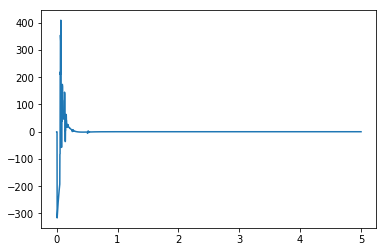

In [16]:
plt.plot(sim.ts, sim.a_s)
#plt.plot(sim.ts, sim.vs)
#plt.plot(sim.ts, sim.thetas)
#plt.plot(sim.ts, sim.voltages)
#plt.plot(sim.ts, sim.currents)
#plt.ylim(1.8, 2.4)
plt.show()

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib
assert matplotlib.rcParams['animation.writer'] in matplotlib.animation.writers.list(), 'choose an available writer!'
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
beta = numpy.zeros(shape=(2,))
radii = numpy.linspace(0, 1, 2)
line, = ax.plot(beta, radii)
dt = sim.ts[1]-sim.ts[0]
frame_interval = 50. # ms
speed_factor = 1
n = int(frame_interval / 1000. / dt) # number of data points to skip
L = len(sim.ts) // n # number of data points sampled at 20 ms
print (n, L, len(sim.ts))
def init():
    return (line,)
def animate(i): 
    #print (i)
    theta = sim.thetas[i * n]
    beta[:] = theta
    line.set_data(beta, radii)
    return (line,)
    

anim = animation.FuncAnimation(fig, animate, frames=L, interval=frame_interval / speed_factor, blit=True)
HTML(anim.to_html5_video())